In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


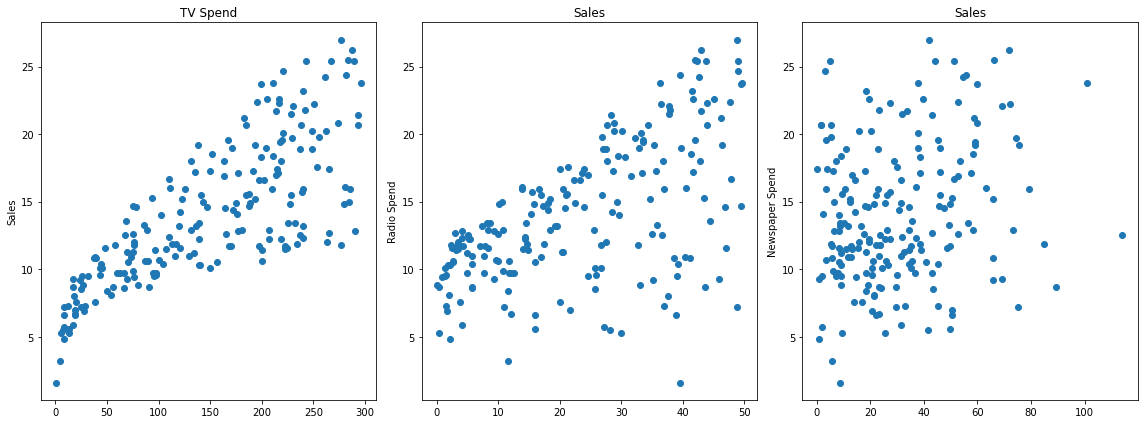

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("Radio Spend")
axes[1].set_title("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel("Newspaper Spend")
axes[2].set_title("Sales")

plt.tight_layout();

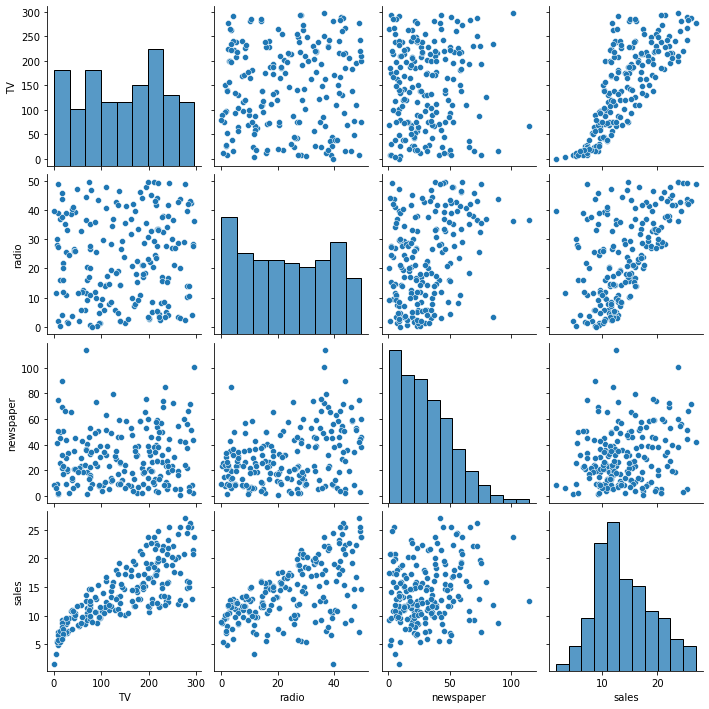

In [6]:
sns.pairplot(df)

In [7]:
X = df.drop('sales', axis=1)

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = df['sales']

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split 

In [14]:
#test_size = % of data to test 
#random_state = 101, arbitrary, but use same in differnt algorithms 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [15]:
len(df)

200

In [16]:
len(X_test)

66

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
#model.predict(X_test)

In [22]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [24]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: sales, Length: 66, dtype: float64

In [26]:
test_predictions = model.predict(X_test)

In [27]:
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

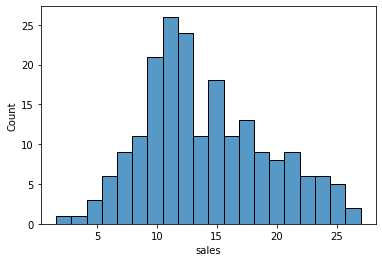

In [32]:
sns.histplot(data=df,x='sales',bins=20)

In [33]:
mean_absolute_error(y_test,test_predictions)

1.4937750024728969

In [35]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.93078438223472

In [36]:
test_residuals = y_test - test_predictions 

In [37]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

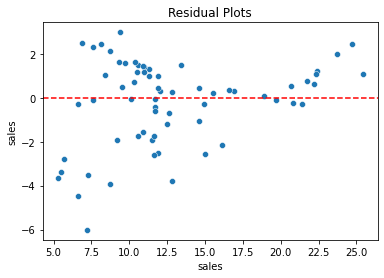

In [43]:
sns.scatterplot(x=y_test,y=test_residuals).set(title='Residual Plots')
plt.axhline(y=0, color='red',ls='--')

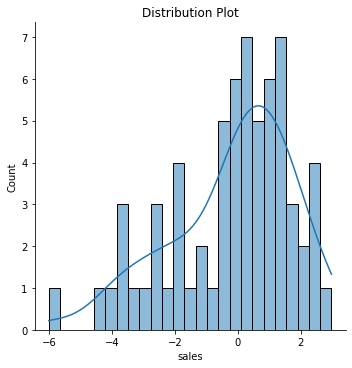

In [44]:
sns.displot(test_residuals,bins=25,kde=True).set(title='Distribution Plot')

In [45]:
import scipy as sp 

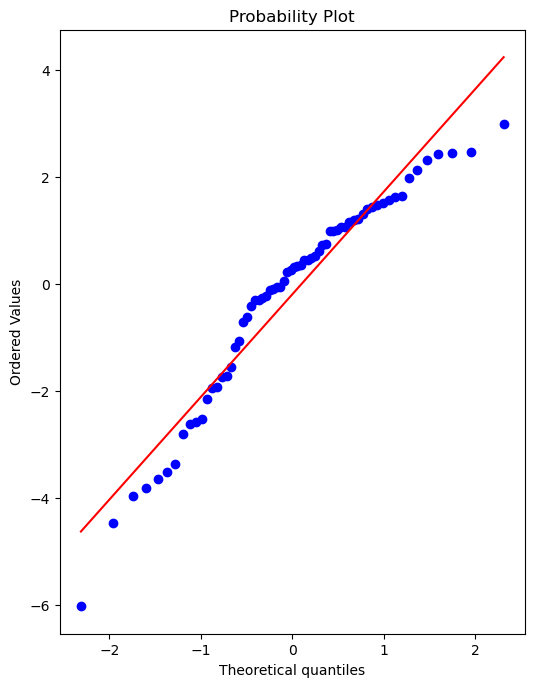

In [47]:
#Create a figure and axis to plot on 
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed 
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [48]:
final_model = LinearRegression()

In [50]:
final_model.fit(X,y)

LinearRegression()

In [51]:
final_model.coef_ 
#Coefficient of each feature 

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [53]:
y_hat = final_model.predict(X)

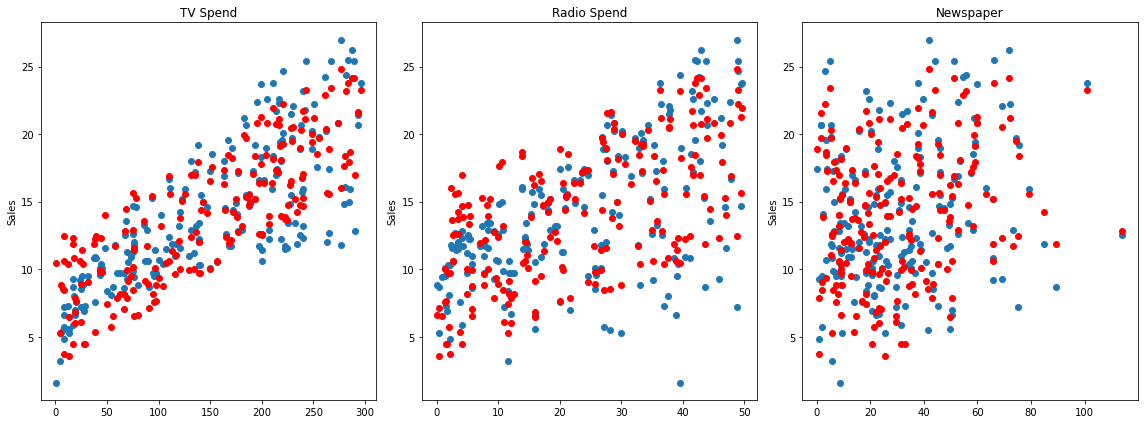

In [56]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper")
plt.tight_layout();

In [57]:
from joblib import dump,load 

In [58]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [59]:
loaded_model = load('final_sales_model.joblib')

In [60]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
X.shape

(200, 3)

In [62]:
#149 TV, #22 Radio, #12 Newspaper 
#Sales?
campaign = [[149,22,12]]

In [63]:
loaded_model.predict(campaign)

array([13.893032])